# Geospatial Analysis with GeoPandas

This notebook demonstrates fundamental operations with GeoPandas using country-level data.

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading Geospatial Data

We'll load the `countries.geojson` file, which contains the polygons for each country.

In [7]:
countries = gpd.read_file("countries.geojson")
countries.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,geometry
0,3,Admin-0 country,5.0,Netherlands,NL1,1.0,2.0,Country,Aruba,ABW,...,North America,Americas,Caribbean,Latin America & Caribbean,5.0,5.0,5.0,4.0,-99.0,"POLYGON ((-69.89912 12.452, -69.8957 12.423, -..."
1,1,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,AFG,...,Asia,Asia,Southern Asia,South Asia,11.0,11.0,4.0,-99.0,1.0,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
2,1,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,AGO,...,Africa,Africa,Middle Africa,Sub-Saharan Africa,6.0,6.0,4.0,-99.0,1.0,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
3,1,Admin-0 country,6.0,United Kingdom,GB1,1.0,2.0,Dependency,Anguilla,AIA,...,North America,Americas,Caribbean,Latin America & Caribbean,8.0,8.0,4.0,-99.0,-99.0,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
4,1,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,ALB,...,Europe,Europe,Southern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."


## 2. Loading Attribute Data

Now, we load the HDI data from `HDI.csv` using pandas.

In [8]:
hdi = pd.read_csv("HDI.csv")
hdi.head()

,Unnamed: 0,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,0,1,Norway,1.0,0.949,81.7,12.7,67614.0,5.0,0.0,...,5.4,3.3,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,...,8.0,4.3,0.921,1.9,0.921,17.7,0.753,6.0,1.4,34.9
2,2,3,Switzerland,2.0,0.939,83.1,13.4,56364.0,7.0,0.0,...,8.4,3.8,0.934,5.7,0.840,15.7,0.806,4.9,1.2,31.6
3,3,4,Germany,4.0,0.926,81.1,13.2,45000.0,13.0,0.0,...,7.0,3.7,0.905,2.6,0.891,14.8,0.787,4.6,1.1,30.1
4,4,5,Denmark,5.0,0.925,80.4,12.7,44519.0,13.0,2.0,...,7.0,3.8,0.894,3.0,0.896,14.3,0.789,4.5,1.0,29.1


## 3. Merging Geospatial and Attribute Data

We merge the `GeoDataFrame` with the `DataFrame` based on the country names. We need to make sure the column names for merging are the same.

In [9]:
hdi = hdi.rename(columns={"Country": "country"})
world = countries.merge(hdi, left_on='admin', right_on='country', how='left')
world.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,3,Admin-0 country,5.0,Netherlands,NL1,1.0,2.0,Country,Aruba,ABW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,AFG,...,30.4,35.7,0.403,44.8,0.219,10.8,0.395,NaN,NaN,NaN
2,1,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,AGO,...,36.6,46.2,0.271,34.6,0.316,28.9,0.445,8.9,2.2,42.7
3,1,Admin-0 country,6.0,United Kingdom,GB1,1.0,2.0,Dependency,Anguilla,AIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,ALB,...,13.4,9.9,0.804,11.9,0.630,18.3,0.571,4.3,1.0,29.0


## 4. GeoSeries Operations

A `GeoSeries` is a column in a `GeoDataFrame` that holds the geometry objects. Let's explore the `geometry` GeoSeries.

In [10]:
# The 'geometry' column is a GeoSeries
type(world.geometry)

geopandas.geoseries.GeoSeries

### Calculating Area

We can calculate the area of each polygon in the GeoSeries. Note that the area will be in the units of the coordinate reference system (CRS).

In [11]:
world['area_sq_degrees'] = world.geometry.area
world[['admin', 'area_sq_degrees']].head()

C:\Users\priti\AppData\Local\Temp\ipykernel_19988\3937112044.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['area_sq_degrees'] = world.geometry.area


,admin,area_sq_degrees
0,Aruba,0.012863
1,Afghanistan,62.557930
2,Angola,103.587272
3,Anguilla,0.007092
4,Albania,3.043388


### Finding Centroids

The centroid is the geometric center of a feature.

In [12]:
world['centroid'] = world.geometry.centroid
world[['admin', 'centroid']].head()

C:\Users\priti\AppData\Local\Temp\ipykernel_19988\199519370.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid


,admin,centroid
0,Aruba,POINT (-69.98268 12.52088)
1,Afghanistan,POINT (66.00473 33.83523)
2,Angola,POINT (17.53737 -12.29336)
3,Anguilla,POINT (-63.06499 18.22396)
4,Albania,POINT (20.04983 41.14245)


## 5. Plotting Data

GeoPandas makes it easy to create maps from your data.

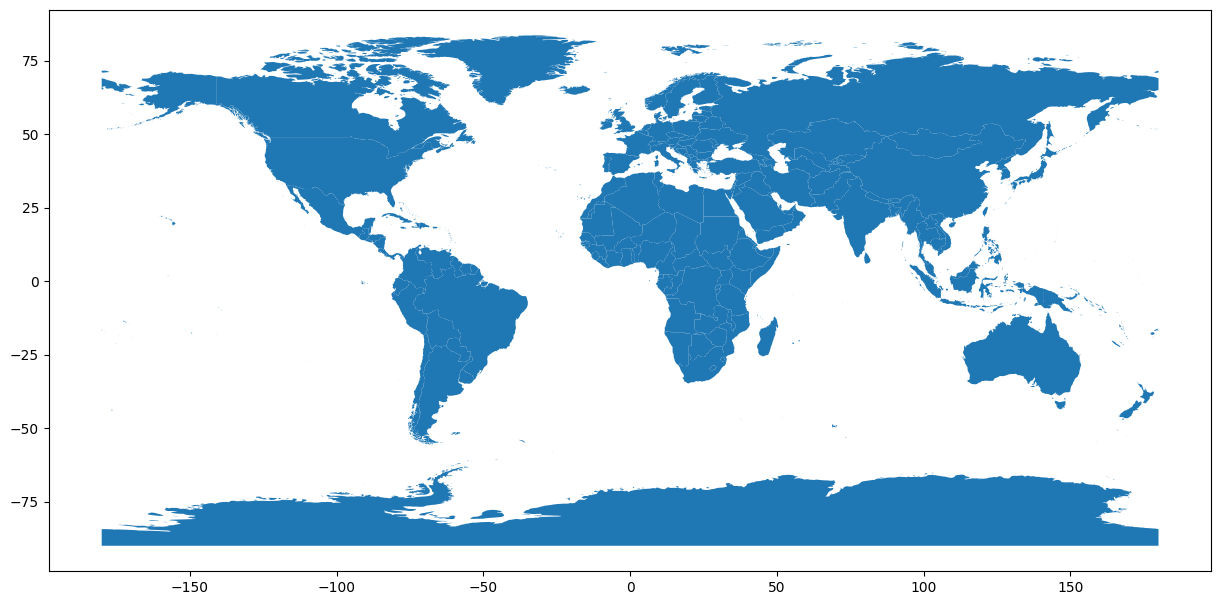

In [13]:
# Simple plot of all countries
world.plot(figsize=(15, 10));

### Choropleth Map

We can create a choropleth map to visualize the HDI values.

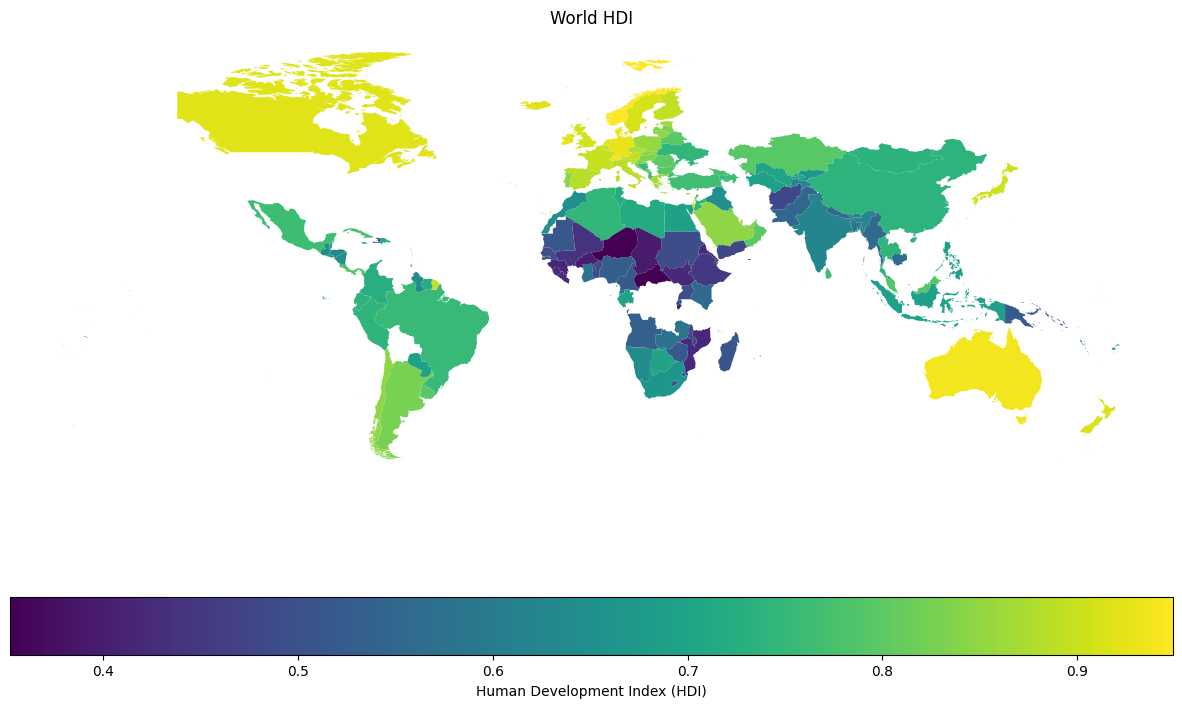

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='HDI', ax=ax, legend=True,
           legend_kwds={'label': "Human Development Index (HDI)",
                        'orientation': "horizontal"})
ax.set_title('World HDI')
ax.set_axis_off();